In [2]:
# Dependencies
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import pickle
import collections


In [5]:
# Params
SAVE_IMAGES = False
SAVE_ANCHORS = True

# Load inputs
out_dir = "./results"
in_dir_emb = os.path.join(out_dir, "embeddings")
in_path_images = os.path.join(out_dir, "images.pickle")
in_path = os.path.join(in_dir_emb, "SwinOsnet.pickle")

out_dir_clustering = os.path.join(out_dir, "clustering")
os.makedirs(out_dir_clustering, exist_ok=True)

out_dir_anchors = os.path.join(out_dir_clustering, "anchors")
os.makedirs(out_dir_anchors, exist_ok=True)


Clustering_labels: [6 4 2 1 1 1 6 5 6 5 5 1 5 5 1 0 0 4 2 1 0 5 5 4 5 4 2 2 2 4 1 3 3 4 0 5 1
 3 0 2 0 3 0 0 0 3 0 3 0 6 2 2]
Number of clusters: 7


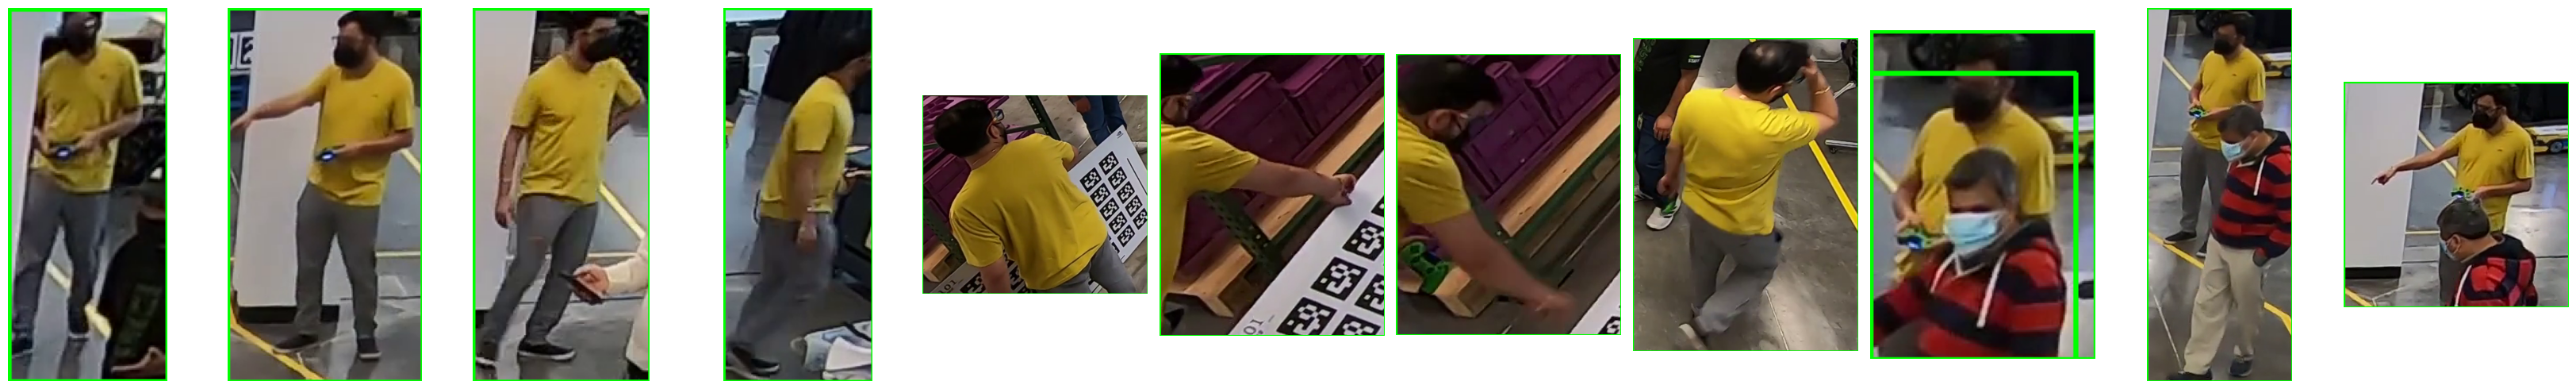

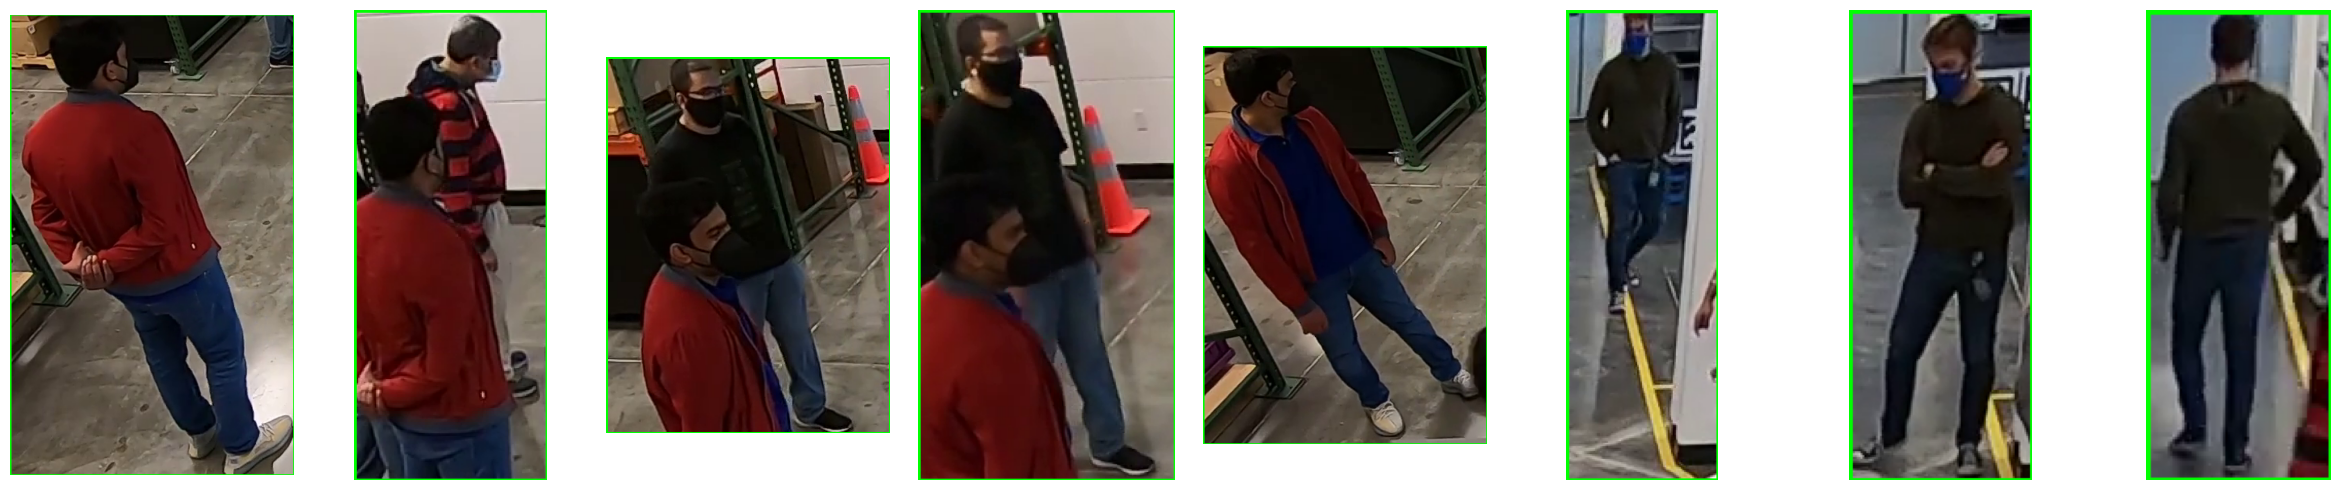

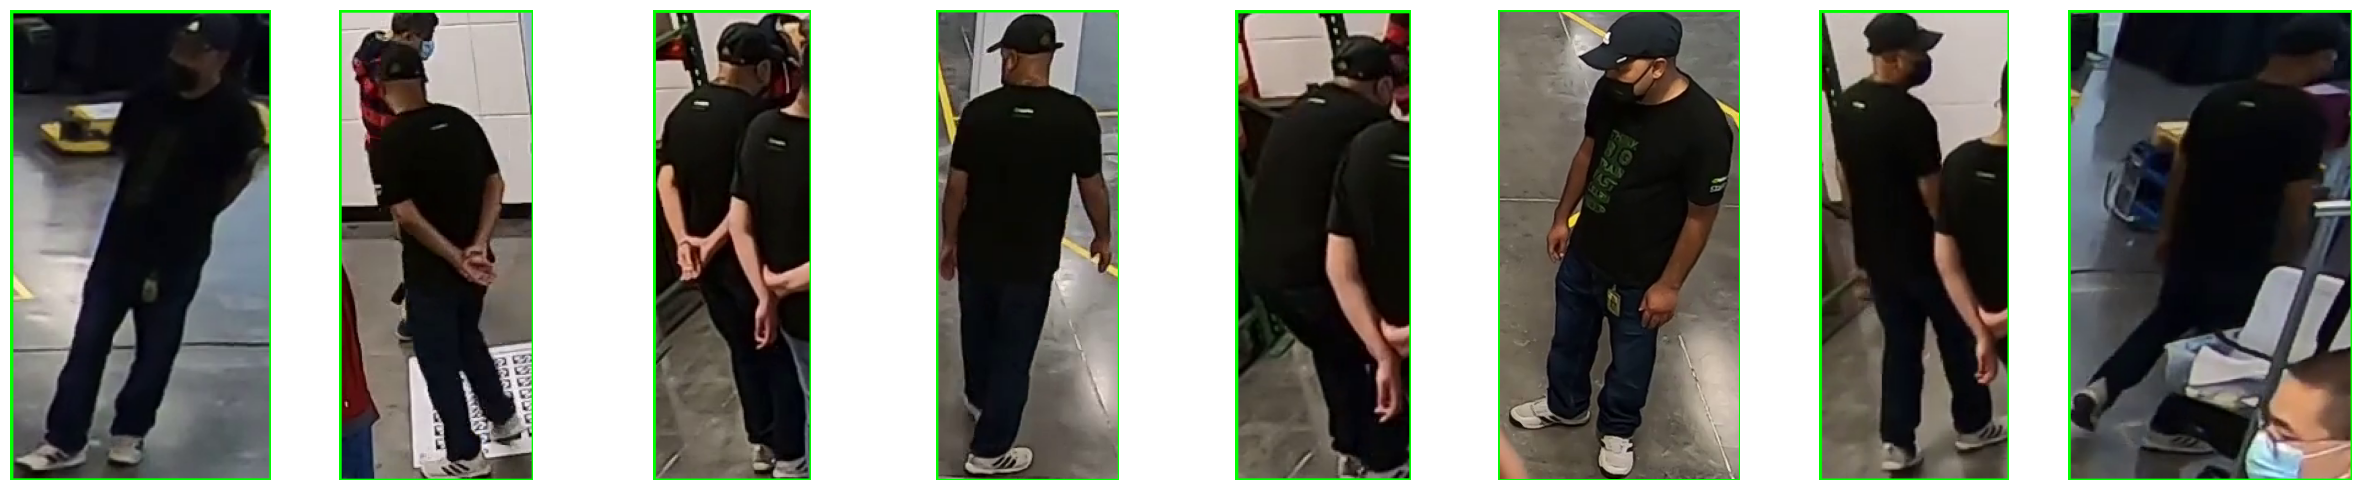

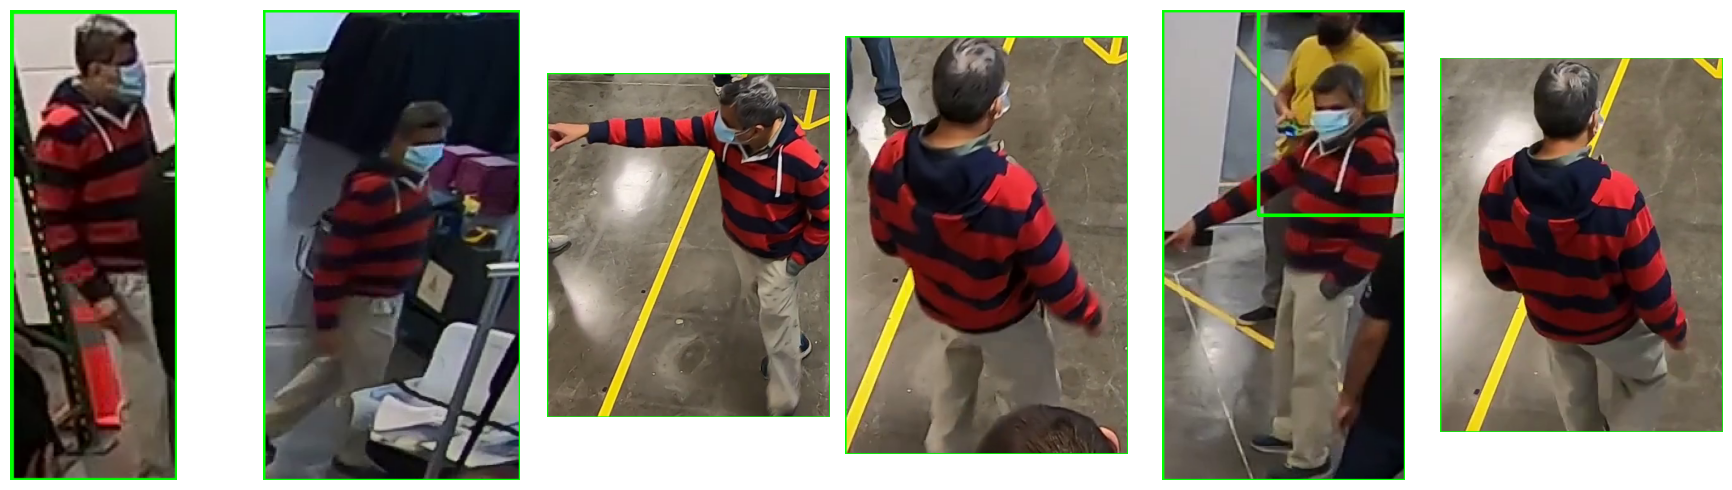

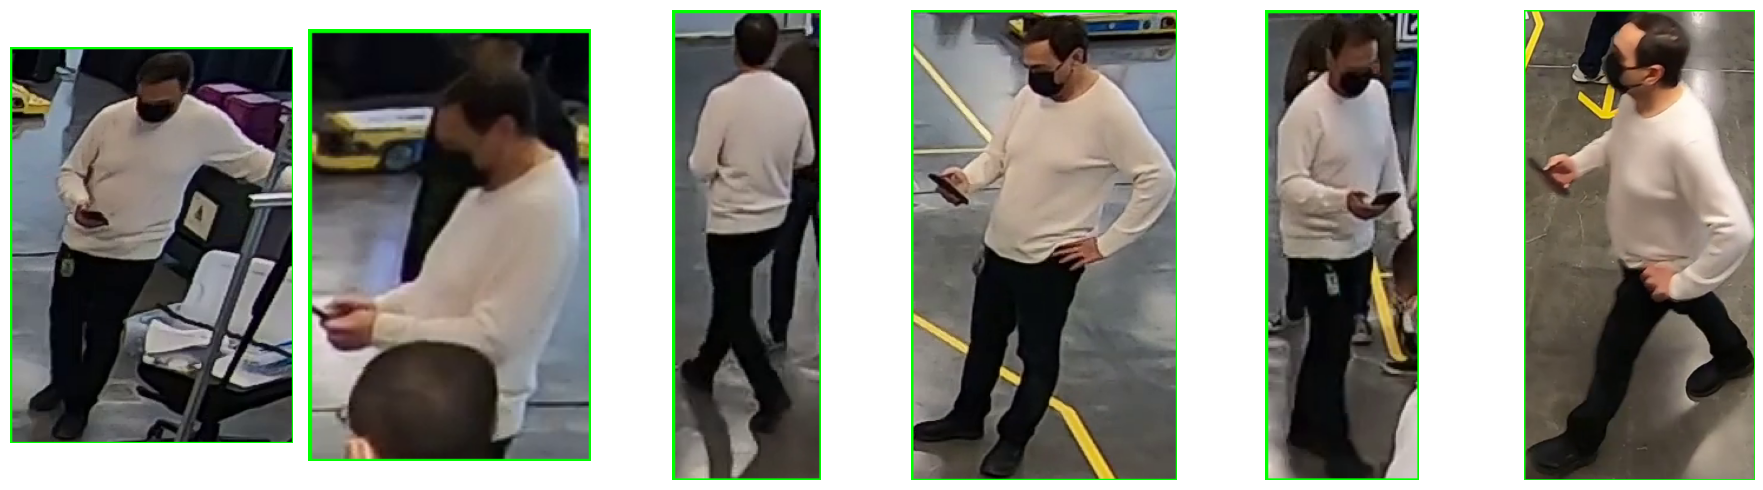

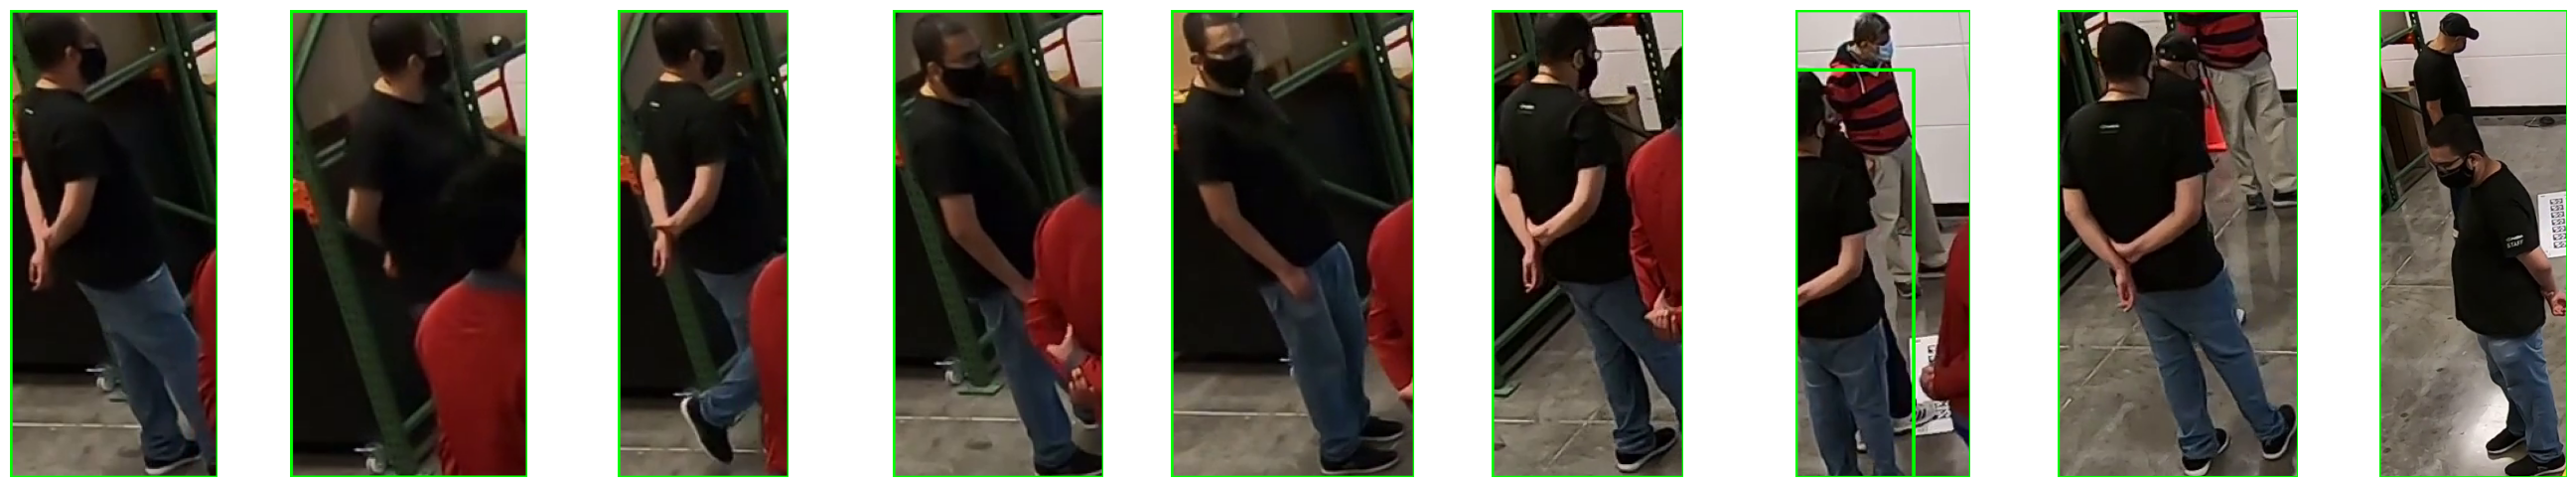

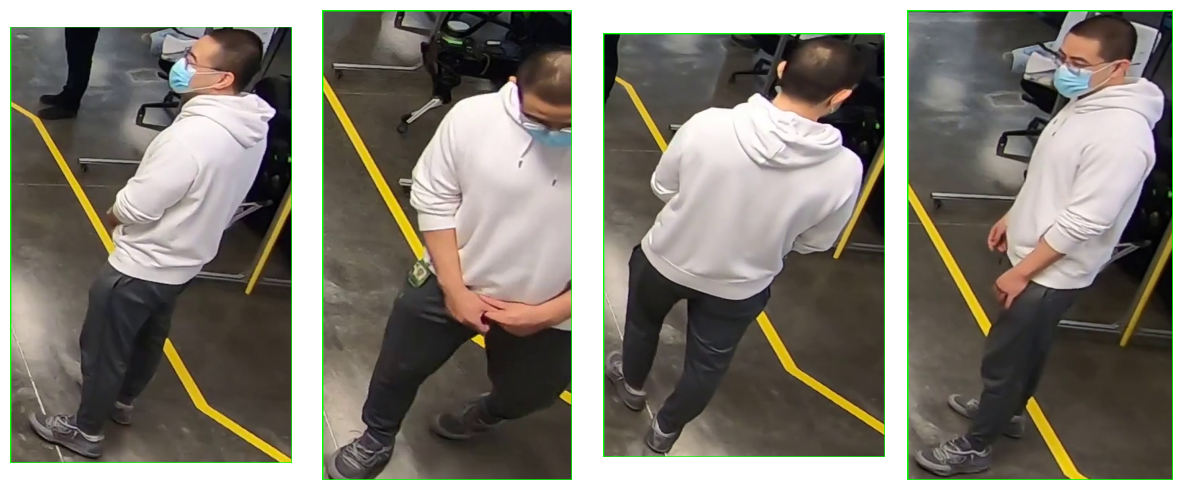

In [4]:
'''
Cluster resulting embeddings
'''

with open(in_path, 'rb') as f:
    embeddings_info = pickle.load(f)

with open(in_path_images, 'rb') as f:
    imgs = pickle.load(f)



emb_img = {}
embeddings = []

for key in embeddings_info.keys():
    emb_img[len(embeddings)] = key # get index of current image
    embeddings.append(embeddings_info[key]["embedding"])


# clustering = AgglomerativeClustering(distance_threshold=50, n_clusters= None).fit(embeddings)
clustering = AgglomerativeClustering(n_clusters=7).fit(embeddings)

print("Clustering_labels:", clustering.labels_)

print("Number of clusters:", clustering.n_clusters_)

for i in range(clustering.n_clusters_):

    cur_imgs = []
    for j in range(len(clustering.labels_)):
        if (clustering.labels_[j] == i):
            cur_imgs.append(imgs[emb_img[j]])
    fig, axes = plt.subplots(1, len(cur_imgs), figsize=(len(cur_imgs) * 3, 5))
    
    if not isinstance(axes, np.ndarray):
        axes = [axes]
    
    for j in range(len(cur_imgs)):
        axes[j].imshow(cur_imgs[j], cmap="gray")  # Assuming grayscale images
        axes[j].axis('off')  # Hide axes
    
    plt.tight_layout()
    if SAVE_IMAGES:
        plt.savefig(os.path.join(out_dir_clustering, f"agglomerative_{i}.png"))

In [6]:
# Create anchors using clusters
anchors = collections.defaultdict(list)

emb_index = 0

for global_id in clustering.labels_:
    anchors[global_id].append(embeddings[emb_index])
    emb_index += 1
    
if SAVE_ANCHORS:
    with open(os.path.join(out_dir_anchors, f"anchors.pickle"), 'wb') as f:
        pickle.dump(anchors, f)

In [8]:
# Traverse through the tracklets and give them a global id based on the cluster they belong to




defaultdict(<class 'list'>, {6: [array([ 0.01974362, -0.00611107,  0.02966926, ...,  0.8026853 ,
        1.4180086 ,  0.9914139 ], dtype=float32), array([ 0.01601585,  0.01392405, -0.01866191, ...,  0.21764578,
        0.91515386,  1.0043758 ], dtype=float32), array([ 0.03212755, -0.0195497 ,  0.0258888 , ...,  0.7256703 ,
        1.9601898 ,  0.51084894], dtype=float32), array([-0.00635573, -0.03269972,  0.05480653, ...,  0.6758291 ,
        0.7778967 ,  0.5757384 ], dtype=float32)], 4: [array([-0.01421035,  0.00332934, -0.03711378, ...,  0.47809258,
        0.        ,  0.        ], dtype=float32), array([ 0.01709248,  0.02510664, -0.00632605, ...,  0.32446808,
        1.1946537 ,  0.3632917 ], dtype=float32), array([ 0.01771843, -0.04211109, -0.05745095, ...,  0.247582  ,
        0.        ,  0.        ], dtype=float32), array([-0.0216227 , -0.01736129, -0.02233225, ...,  0.        ,
        0.        ,  0.02616753], dtype=float32), array([-0.01706919, -0.00146602, -0.09455933, ...,